
<div style="text-align:center; border-radius:15px 50px; padding:15px; color:white; margin:0; font-size:120%; font-family:Pacifico; background-color:RoyalBlue; overflow:hidden">
<b>Introduction</b>
</div>

### Objective
Predict **Life Expectancy** based on various health, economic, and social factors using machine learning models.

### Dataset Overview
The dataset contains various indicators that affect life expectancy, including:
- Health indicators (BMI, Immunization coverage)
- Economic factors (GDP, Income)
- Social factors (Education, Population)

The goal is to build a model that can accurately predict life expectancy and provide insights into the key factors affecting it.


<div style="text-align:center; border-radius:15px 50px; padding:15px; color:white; margin:0; font-size:120%; font-family:Pacifico; background-color:RoyalBlue; overflow:hidden">
<b>Table of Contents</b>
</div>

1. [Introduction](#Task-1:-Understanding-Problem-Statement)  
2. [Import Libraries and Dataset](#Task-2:-Import-Libraries-and-Dataset)  
3. [Exploratory Data Analysis (EDA)](#Task-3:-Exploratory-Data-Analysis)  
4. [Feature Engineering](#Task-4:-Feature-Engineering)  
5. [Model Selection & Training](#Task-5:-Model-Selection-&-Training)
6. [Model Evaluation](#Task-6:-Model-Evaluation)  
7. [Hyperparameter Tuning](#Task-7:-Hyperparameter-Tuning)  
8. [Conclusion](#Task-8:-Conclusion)  
9. [Save Final Model](#Task-9:-Save-the-Model)  


<div style="text-align:center; border-radius:15px 50px; padding:15px; color:white; margin:0; font-size:120%; font-family:Pacifico; background-color:RoyalBlue; overflow:hidden">
<b># Task 1</b>
</div>


# Task 1: Define the Problem Statement

### Problem Overview
Predict life expectancy based on various health, economic, and social factors.

**Target Variable:** Life expectancy

**Features:**
- Health indicators
- Economic factors
- Social factors

This project aims to build a machine learning model to predict life expectancy, which is a crucial metric for understanding public health and quality of life.


<div style="text-align:center; border-radius:15px 50px; padding:15px; color:white; margin:0; font-size:120%; font-family:Pacifico; background-color:RoyalBlue; overflow:hidden">
<b># Task 2</b>
</div>


# Task 2: Import Libraries and Dataset

In this section, we import the necessary libraries and load the dataset into a DataFrame. Pandas is used for data manipulation, while Seaborn and Matplotlib are used for visualization.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('Life_Expectancy_Data.csv')
df.head()

,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5



<div style="text-align:center; border-radius:15px 50px; padding:15px; color:white; margin:0; font-size:120%; font-family:Pacifico; background-color:RoyalBlue; overflow:hidden">
<b># Task 3</b>
</div>


# Task 3: Exploratory Data Analysis (EDA)

### Objective
Perform exploratory data analysis to understand the dataset distribution, identify missing values, and visualize relationships between features and the target variable.

In [3]:
df.shape

(2938, 21)

In [4]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Year                             2938 non-null   int64  
 1   Status                           2938 non-null   object 
 2   Life expectancy                  2928 non-null   float64
 3   Adult Mortality                  2928 non-null   float64
 4   infant deaths                    2938 non-null   int64  
 5   Alcohol                          2744 non-null   float64
 6   percentage expenditure           2938 non-null   float64
 7   Hepatitis B                      2385 non-null   float64
 8   Measles                          2938 non-null   int64  
 9    BMI                             2904 non-null   float64
 10  under-five deaths                2938 non-null   int64  
 11  Polio                            2919 non-null   float64
 12  Total expenditure   

In [6]:
display(df.isnull().sum())

Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

## Visualize missing values

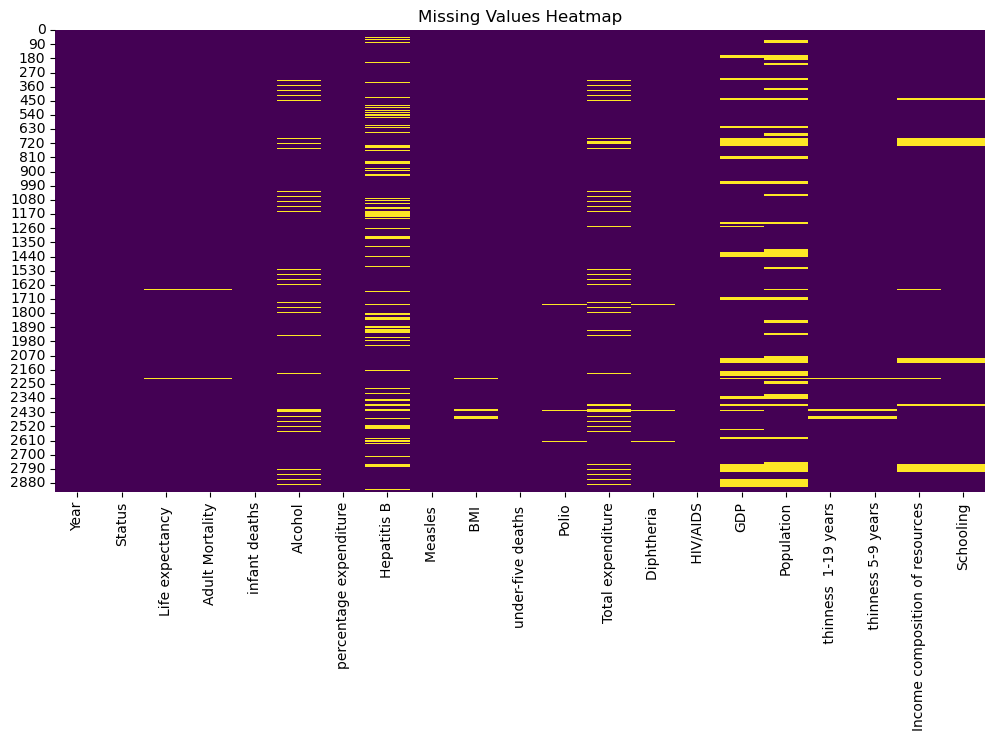

In [7]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

## Visualize distribution of target variable

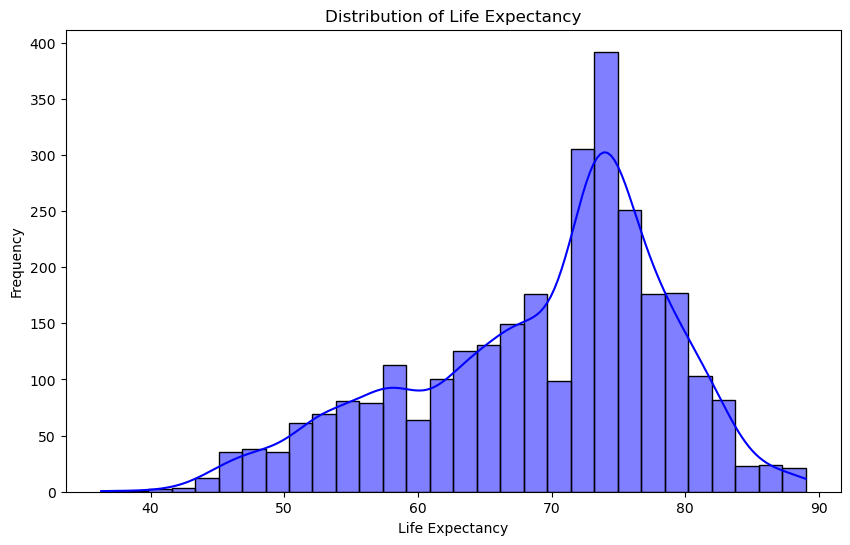

In [8]:
plt.figure(figsize=(10, 6))
sns.histplot(df["Life expectancy "], bins=30, kde=True, color='blue')
plt.title("Distribution of Life Expectancy")
plt.xlabel("Life Expectancy")
plt.ylabel("Frequency")
plt.show()

## Visualize correlations

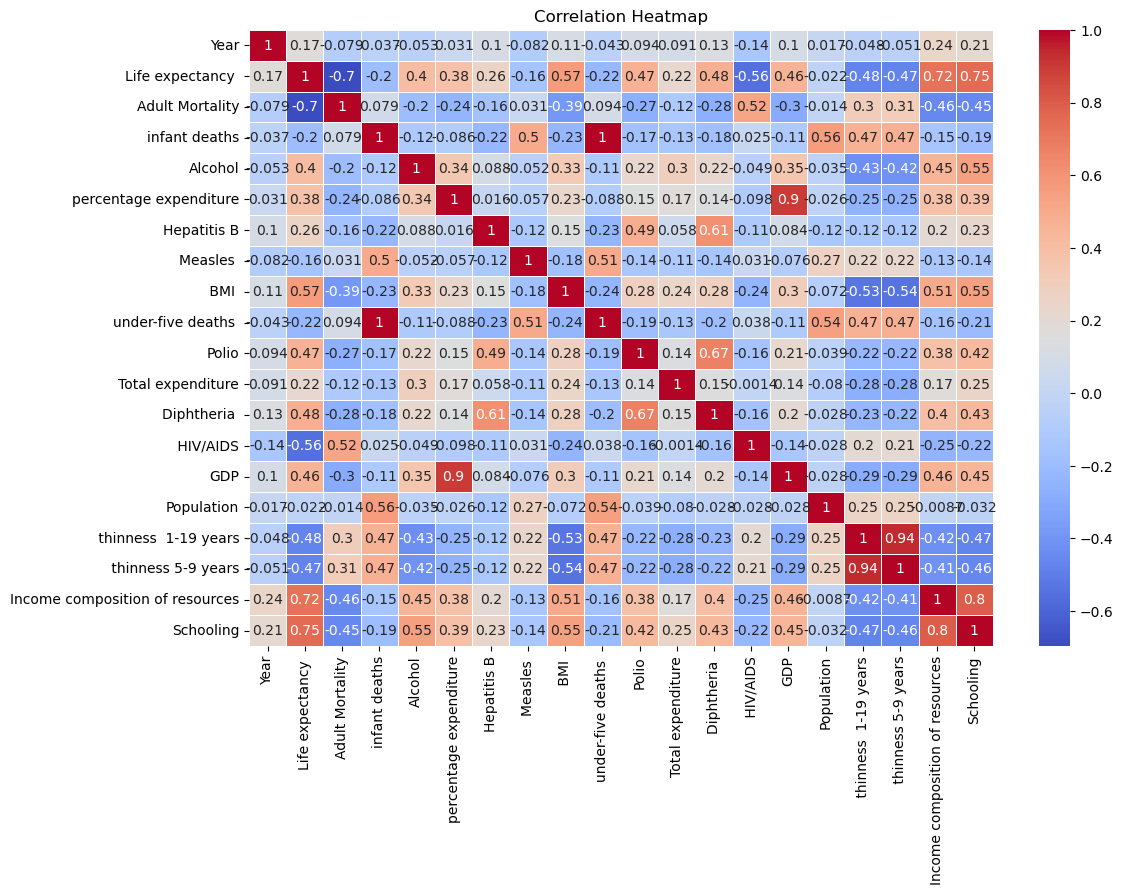

In [9]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm', annot=True, linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

## Pairplot for top correlated features

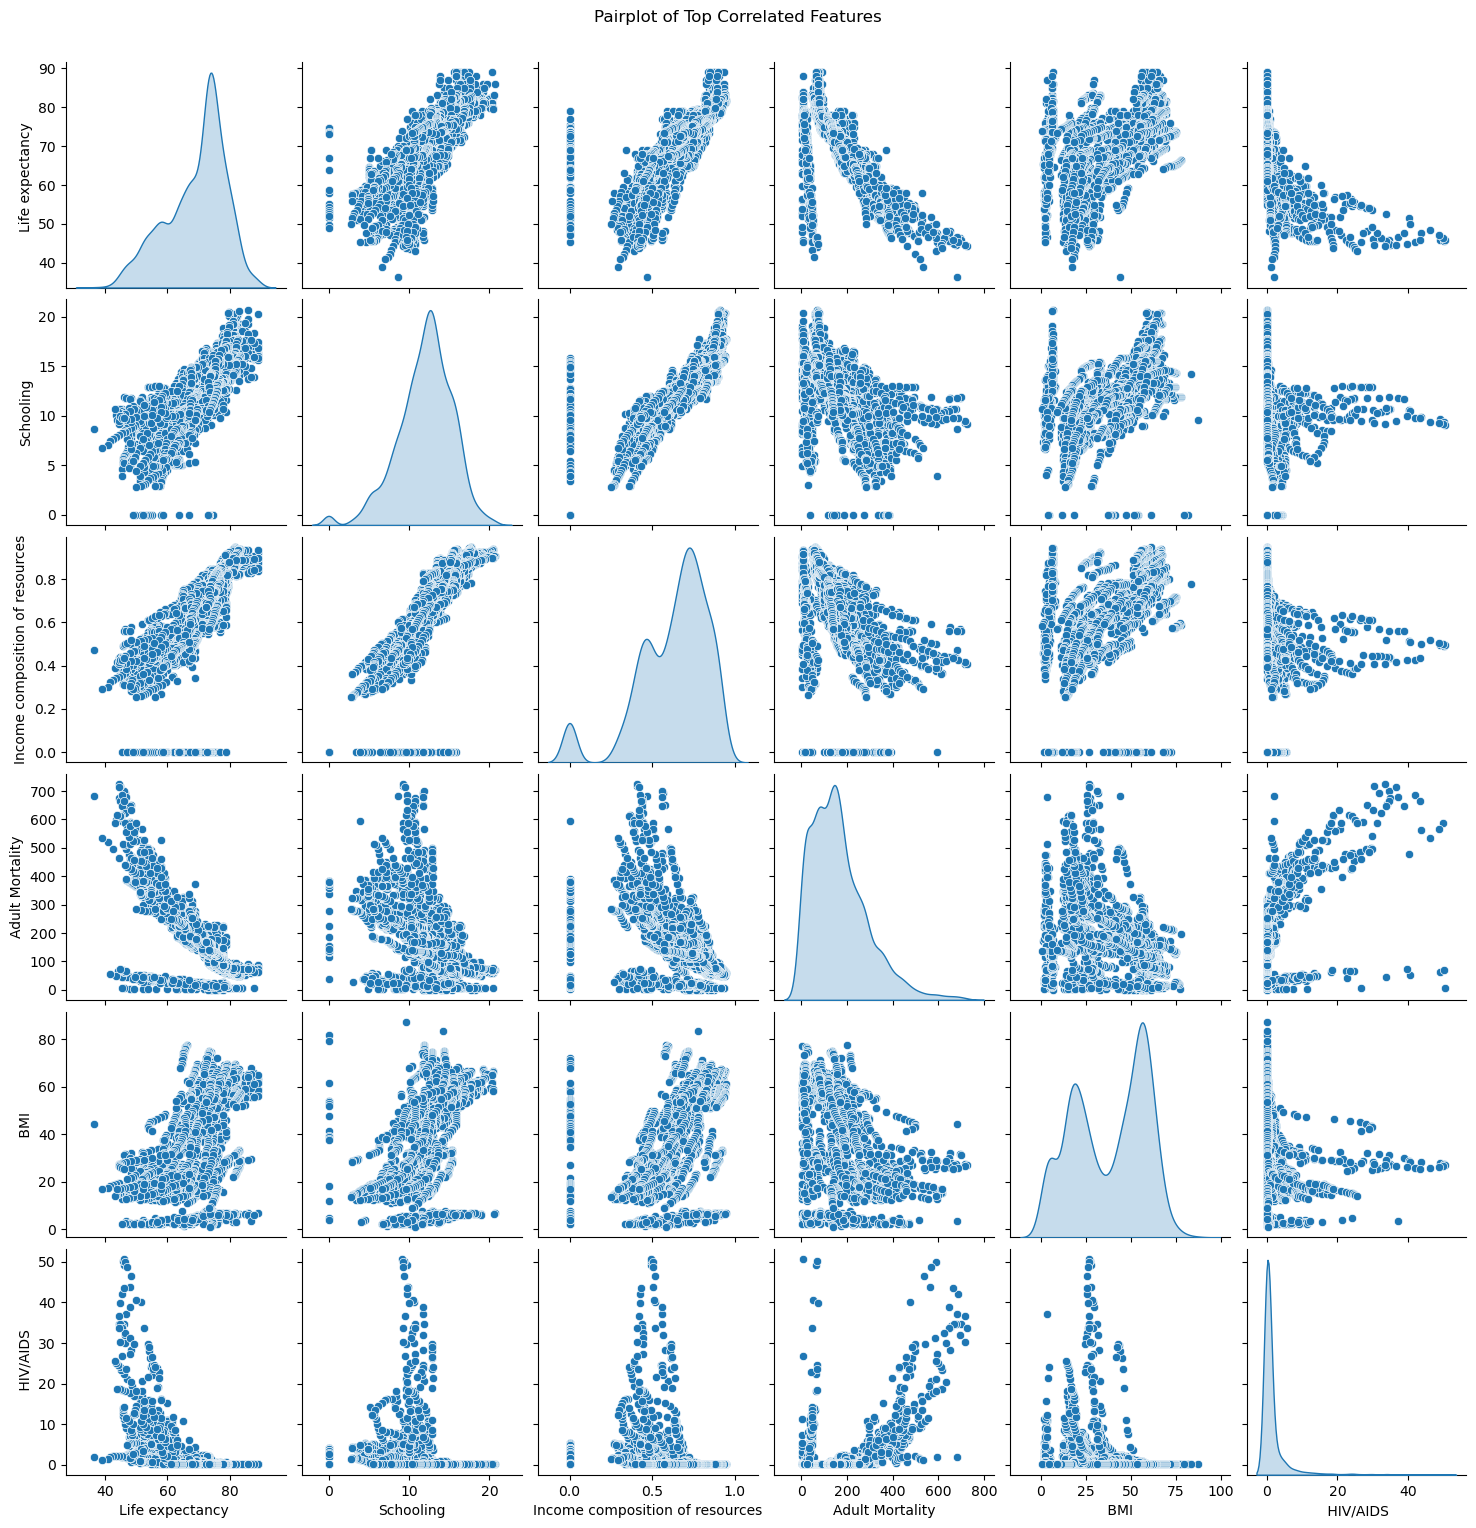

In [10]:
top_corr = df.corr(numeric_only=True)["Life expectancy "].abs().sort_values(ascending=False).head(6).index
sns.pairplot(df[top_corr], diag_kind='kde')
plt.suptitle("Pairplot of Top Correlated Features", y=1.02)
plt.show()

## Filling missing values

In [11]:
for col in df.select_dtypes(include=np.number).columns:
    df[col] = df[col].fillna(df[col].median())

In [12]:
# fill categorical columns
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].fillna(df[col].mode()[0])

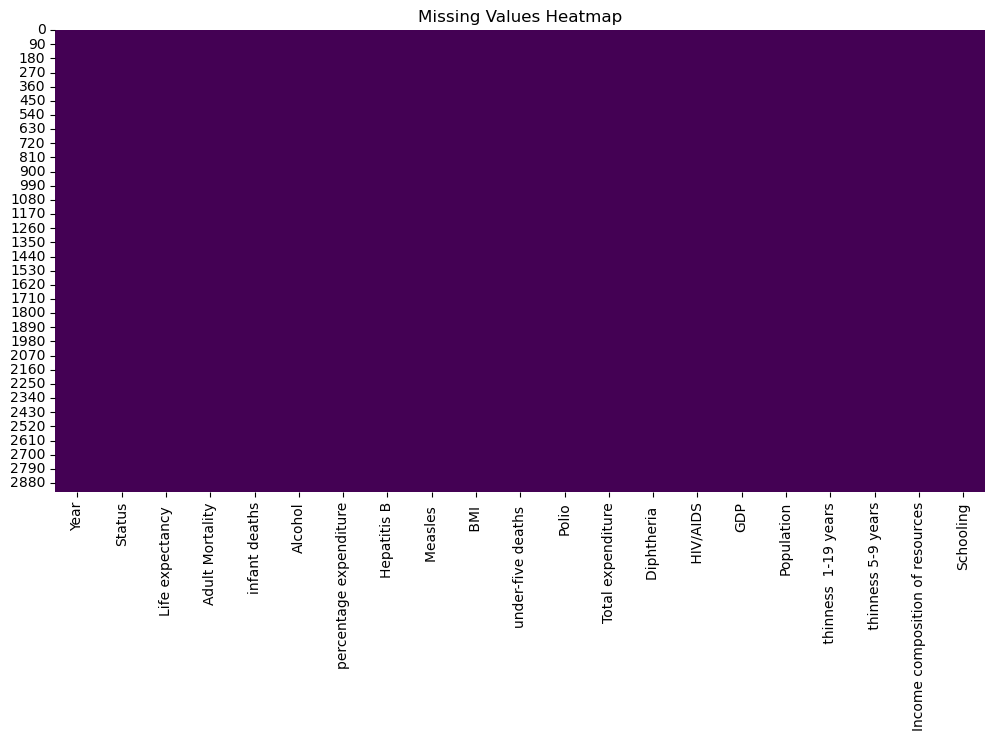

In [13]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()


<div style="text-align:center; border-radius:15px 50px; padding:15px; color:white; margin:0; font-size:120%; font-family:Pacifico; background-color:RoyalBlue; overflow:hidden">
<b># Task 4</b>
</div>


# Task 4: Feature Engineering

### Objective:
Prepare the dataset for model training by performing encoding of categorical variables, selecting the most relevant features and scaling numerical features. These transformations help the model interpret the data effectively and improve its predictive performance.

### Encode Categorical Data

In [14]:
df = pd.get_dummies(df,columns=['Status'],drop_first = True)

### Normalize/Scale Numerical Features

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
cols = df.select_dtypes(include=np.number).columns

In [16]:
df[cols] = scaler.fit_transform(df[cols])

In [17]:
df

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Status_Developing
0,1.621762,-0.445408,0.792119,0.268824,-1.156989,-0.335570,-0.783807,-0.110384,-0.967349,0.255359,...,0.931485,-0.735391,-0.323445,-0.453371,0.435183,2.815209,2.775386,-0.737973,-0.585017,True
1,1.404986,-0.981827,0.856601,0.285786,-1.156989,-0.334441,-0.914281,-0.168124,-0.992434,0.274060,...,0.939818,-0.862233,-0.323445,-0.451232,-0.183349,2.883439,2.819978,-0.752600,-0.615649,True
2,1.188210,-0.981827,0.832421,0.302749,-1.156989,-0.334594,-0.827298,-0.173531,-1.017519,0.292761,...,0.918987,-0.777671,-0.323445,-0.449799,0.398066,2.928926,2.864570,-0.781853,-0.646281,True
3,0.971434,-1.023899,0.864662,0.328193,-1.156989,-0.332096,-0.696824,0.032045,-1.042605,0.317696,...,1.081463,-0.650830,-0.323445,-0.446924,-0.120968,2.974413,2.931458,-0.815982,-0.676912,True
4,0.754658,-1.055453,0.888843,0.345155,-1.156989,-0.367862,-0.653333,0.051757,-1.062673,0.342631,...,0.810670,-0.608549,-0.323445,-0.492539,-0.134268,3.042643,2.976051,-0.859862,-0.768808,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,-0.762774,-2.622638,4.499850,-0.028022,-0.047657,-0.371433,-0.653333,-0.208332,-0.565984,-0.000223,...,0.502383,-0.735391,6.275044,-0.463141,0.047149,1.041221,1.013994,-1.089014,-0.860703,True
2934,-0.979550,-2.601602,4.435368,-0.036503,-0.124162,-0.371433,-3.306306,-0.123991,-0.586052,-0.006456,...,0.248255,-0.608549,6.885650,-0.463218,0.044490,1.132194,1.125475,-1.035383,-0.768808,True
2935,-1.196326,-2.570047,-0.739335,-0.044984,-0.029805,-0.371433,-0.435876,-0.184521,-0.606120,-0.012690,...,0.252421,-0.481708,7.496256,-0.493005,-0.187090,-0.823741,-0.791989,-0.991502,-0.615649,True
2936,-1.413102,-2.517457,4.201620,-0.044984,-0.720907,-0.371433,-0.305402,-0.164897,-0.626188,-0.018924,...,0.098278,-0.312585,7.949287,-0.456054,0.039533,-0.732768,-0.702805,-0.991502,-0.676912,True


### Feature Selection

In [18]:
X = df.drop("Life expectancy ", axis=1)
y = df["Life expectancy "]

<div style="text-align:center; border-radius:15px 50px; padding:15px; color:white; margin:0; font-size:120%; font-family:Pacifico; background-color:RoyalBlue; overflow:hidden">
<b>Splitting Data</b>
</div>

In [19]:
from sklearn.model_selection import train_test_split,GridSearchCV

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42) # ensures that the results are consistent every time run the code.

In [20]:
X_train.shape

(2350, 20)

In [21]:
X_test.shape

(588, 20)


<div style="text-align:center; border-radius:15px 50px; padding:15px; color:white; margin:0; font-size:120%; font-family:Pacifico; background-color:RoyalBlue; overflow:hidden">
<b># Task 5</b>
</div>


# Task 5: Model Selection & Training

### Objective
In this step, we select the **XGBoost Regressor** model due to its efficiency in handling regression problems. The model is trained using the training dataset, and its performance is evaluated on the test set.

### TRAIN AN XG-BOOST REGRESSION MODEL 

In [22]:
import xgboost as xgb
model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [23]:
# make predictions on the test data
y_pred = model.predict(X_test)
y_pred

array([ 0.418464  ,  0.6871407 ,  0.5784546 ,  0.6500148 , -1.884705  ,
       -1.6605306 , -0.382493  ,  0.48842075,  0.81601906, -1.2674524 ,
       -1.8192209 , -1.6002477 , -1.3944088 ,  0.47459102,  0.03625286,
       -0.78510046, -1.3703407 ,  1.0882391 ,  0.2530157 ,  0.9385832 ,
        1.1672038 ,  1.7904307 ,  0.26188046, -0.04461197,  0.322218  ,
       -0.20237657, -1.4491985 , -0.34661418,  1.3915777 ,  0.63852066,
       -0.2258306 ,  0.46720698,  0.4833642 ,  0.31085503,  0.9397635 ,
       -2.4548411 , -0.8080153 ,  0.47229344, -0.6229051 ,  0.5414215 ,
       -1.5060798 , -0.8500204 ,  0.65570974,  1.4885509 ,  0.77469987,
       -2.1795115 ,  1.248608  ,  0.4388958 , -0.9109886 ,  0.43995255,
       -1.4569173 ,  0.04199208,  1.3313693 ,  1.2778742 ,  0.5937676 ,
       -1.0878199 ,  0.45106477,  0.5758445 , -0.559094  , -0.15007164,
        1.0015041 , -1.6311532 ,  0.5790159 ,  0.3964955 , -1.6606563 ,
       -1.6681246 , -1.6414561 ,  0.733284  , -0.8634044 , -0.11

<div style="text-align:center; border-radius:15px 50px; padding:15px; color:white; margin:0; font-size:120%; font-family:Pacifico; background-color:RoyalBlue; overflow:hidden">
<b># Task 6</b>
</div>

# Task 6: Model-Evaluation

In [24]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

print("XGBoost R2 Score:", r2_score(y_test, y_pred))
print("XGBoost MAE:", mean_absolute_error(y_test, y_pred))
print("XGBoost RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

XGBoost R2 Score: 0.964661859744738
XGBoost MAE: 0.12435019547954461
XGBoost RMSE: 0.1840701916916443


<div style="text-align:center; border-radius:15px 50px; padding:15px; color:white; margin:0; font-size:120%; font-family:Pacifico; background-color:RoyalBlue; overflow:hidden">
<b># Task 7</b>
</div>


# Task 7: Hyperparameter Tuning
### Objective

To further improve performance, **GridSearchCV** is applied for hyperparameter tuning. This technique exhaustively searches through a predefined grid of hyperparameter combinations to find the best configuration.

The key hyperparameters tuned are:
- **n_estimators**: Number of boosting rounds
- **max_depth**: Maximum depth of the trees
- **learning_rate**: Step size shrinkage used in updates

The best model is selected based on the highest **R-squared score**.

In [25]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}
gs = GridSearchCV(model, param_grid, cv=5, scoring='r2')
gs.fit(X_train, y_train)
print("Best Parameters:", gs.best_params_)
y_pred_gs = gs.best_estimator_.predict(X_test)

print("Tuned XGBoost R2 Score:", r2_score(y_test, y_pred_gs))
print("Tuned XGBoost MAE:", mean_absolute_error(y_test, y_pred_gs))
print("Tuned XGBoost RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_gs)))


Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300}
Tuned XGBoost R2 Score: 0.9679584902226263
Tuned XGBoost MAE: 0.1171186120875216
Tuned XGBoost RMSE: 0.1752742451180088


<div style="text-align:center; border-radius:15px 50px; padding:15px; color:white; margin:0; font-size:120%; font-family:Pacifico; background-color:RoyalBlue; overflow:hidden">
<b># Task 8</b>
</div>

# Task 8: Conclusion
In this step, the model's performance is evaluated by comparing the **XGBoost model with hyperparameter tuning** against the **baseline XGBoost model**.  
The comparison is based on the **R-squared score (R²)**, which measures how well the model predicts the target variable.

In [26]:
if r2_score(y_test, y_pred_gs) > r2_score(y_test, y_pred):
    print("XGBoost with Hyperparameter Tuning is the best model.")
else:
    print("XGBoost without tuning is the best model.")

XGBoost with Hyperparameter Tuning is the best model.


## Visualize the top contributing features

<Figure size 1200x800 with 0 Axes>

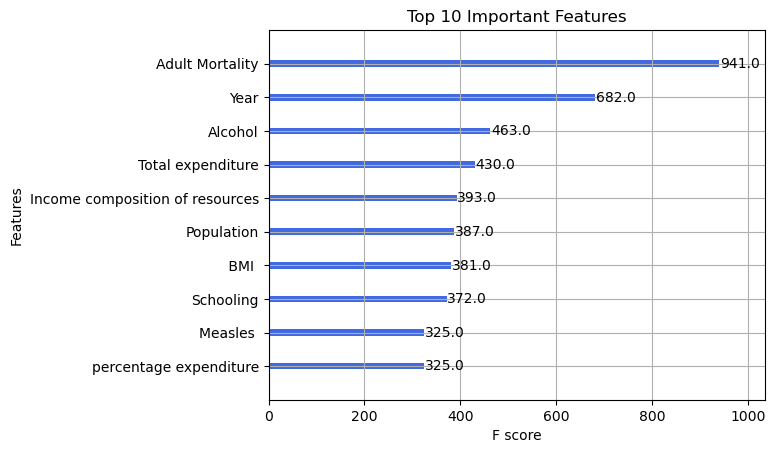

In [27]:
# Plot Feature Importance
plt.figure(figsize=(12, 8))
xgb.plot_importance(gs.best_estimator_, max_num_features=10, importance_type='weight', color='RoyalBlue')
plt.title("Top 10 Important Features")
plt.show()

<div style="text-align:center; border-radius:15px 50px; padding:15px; color:white; margin:0; font-size:120%; font-family:Pacifico; background-color:RoyalBlue; overflow:hidden">
<b># Task 9</b>
</div>

# Task 9: Save the Model

In [28]:
# Save Final Model
import pickle
with open("life_expectancy_model.pkl", "wb") as f:
    pickle.dump(gs.best_estimator_, f)

print("Model Saved Successfully")

Model Saved Successfully
